# 8. Ανάγνωση αρχείων csv, η βιβλιοθήκη pandas

Στόχος του μαθήματος είναι να εξοικειωθεί ο φοιτητής με την ανάγνωση και εγγραφή αρχείων CSV. 
Επίσης γίνεται μια σύντομη αναφορά στις δυνατότητες της βιβλιοθήκης pandas όσον αφορά την διαχείριση δεδομένων σε μορφή πινάκων.

## Ανάγνωση αρχείων csv

Εισάγουμε τα απαραίτητα άρθρωματα (modules).

In [1]:
import os # μας επιτρέπει να έχουμε αλληλεπίδραση με το λειτουργικό σύστημα
import csv # απαραίτητο για την ανάγνωση και εγγραφή αρχείων CSV
from urllib import request # απαραίτητο για την λήψη αρχείων από το διαδίκτυο
import pandas as pd # η βιβλιοθήκη pandas για την διαχείρηση πινάκων
from pathlib import Path # βιβλιοθήκη για την διαχείριση των διαδρομών (paths) στον δίσκο
import numpy as np


Προαιρετικά ελέγχουμε ποιος είναι ο τρέχων κατάλογος:

In [2]:
print(os.getcwd())

/home/leonidas/PARA/2_Areas/Academic/uth/ΤΜΧΠΑ/Programming/JupyterNotebooks/notes/notebooks


Αρχικά κατεβάζουμε από το διαδίκτυο τα αναγκαία αρχεία CSV.

(Πηγή δεδομένων https://www.kaggle.com/datasets/rinichristy/covid19-coronavirus-pandemic)

In [3]:
# Πρώτο αρχείο
remote_url = 'https://raw.githubusercontent.com/kokkytos/programming/main/docs/COVID-19%20Coronavirus.csv'
# Define the local filename to save data
local_file1 = 'COVID-19_Coronavirus.csv'
# Download remote and save locally
request.urlretrieve(remote_url, local_file1)

# Δεύτερο αρχείο
remote_url = 'https://raw.githubusercontent.com/kokkytos/programming/main/docs/COVID-19%20Coronavirus_V2.csv'
# Define the local filename to save data
local_file2 = 'COVID-19_Coronavirus_V2.csv'
# Download remote and save locally
request.urlretrieve(remote_url, local_file2)

('COVID-19_Coronavirus_V2.csv', <http.client.HTTPMessage at 0x7f3483a262e0>)

In [4]:
with open(local_file1, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population', 'Continent', 'Total Cases', 'Total Deaths', 'Tot\xa0Cases//1M pop', 'Tot\xa0Deaths/1M pop', 'Death percentage']
['Afghanistan', 'Afghanistan', 'AFG', '40462186', 'Asia', '177827', '7671', '4395', '190', '4.313743132']
['Albania', 'Albania', 'ALB', '2872296', 'Europe', '273870', '3492', '95349', '1216', '1.275057509']
['Algeria', 'Algeria', 'DZA', '45236699', 'Africa', '265691', '6874', '5873', '152', '2.587215976']
['Andorra', 'Andorra', 'AND', '77481', 'Europe', '40024', '153', '516565', '1975', '0.382270638']
['Angola', 'Angola', 'AGO', '34654212', 'Africa', '99194', '1900', '2862', '55', '1.915438434']
['Anguilla', 'Anguilla', 'AIA', '15237', 'Latin America and the Caribbean', '2700', '9', '177200', '591', '0.333333333']
['Antigua and Barbuda', 'Antigua and Barbuda', 'ATG', '99348', 'Latin America and the Caribbean', '7493', '135', '75422', '1359', '1.801681569']
['Argentina', 'Argentina', 'ARG', '45921761', 'Latin 

In [5]:
with open(local_file1, 'r') as file:
    reader = csv.reader(file)
    line_count = 0
    for row in reader:
        if line_count == 0:
            print(f'Ονόματα στηλών {", ".join(row)}')
            print("\n\n")
            line_count += 1
        else:
            print(row)

Ονόματα στηλών Country, Other names, ISO 3166-1 alpha-3 CODE, Population, Continent, Total Cases, Total Deaths, Tot Cases//1M pop, Tot Deaths/1M pop, Death percentage



['Afghanistan', 'Afghanistan', 'AFG', '40462186', 'Asia', '177827', '7671', '4395', '190', '4.313743132']
['Albania', 'Albania', 'ALB', '2872296', 'Europe', '273870', '3492', '95349', '1216', '1.275057509']
['Algeria', 'Algeria', 'DZA', '45236699', 'Africa', '265691', '6874', '5873', '152', '2.587215976']
['Andorra', 'Andorra', 'AND', '77481', 'Europe', '40024', '153', '516565', '1975', '0.382270638']
['Angola', 'Angola', 'AGO', '34654212', 'Africa', '99194', '1900', '2862', '55', '1.915438434']
['Anguilla', 'Anguilla', 'AIA', '15237', 'Latin America and the Caribbean', '2700', '9', '177200', '591', '0.333333333']
['Antigua and Barbuda', 'Antigua and Barbuda', 'ATG', '99348', 'Latin America and the Caribbean', '7493', '135', '75422', '1359', '1.801681569']
['Argentina', 'Argentina', 'ARG', '45921761', 'Latin America an

To κόμμα (,) χρησιμοποιείται ως προκαθορισμένη επιλογή σαν διαχωριστικό στηλών.
Μπορούμε ρητά να δηλώσουμε ποιο θα είναι το διαχωριστικό με την επιλογή _delimiter_.

In [6]:
with open(local_file2, 'r') as file:
    reader = csv.reader(file, delimiter = ';',quoting=csv.QUOTE_ALL)
    for row in reader:
        print(row)

['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population', 'Continent', 'Total Cases', 'Total Deaths', 'Tot\xa0Cases//1M pop', 'Tot\xa0Deaths/1M pop', 'Death percentage']
['Afghanistan', 'Afghanistan', 'AFG', '40462186', 'Asia', '177827', '7671', '4395', '190', '4.313743132']
['Albania', 'Albania', 'ALB', '2872296', 'Europe', '273870', '3492', '95349', '1216', '1.275057509']
['Algeria', 'Algeria', 'DZA', '45236699', 'Africa', '265691', '6874', '5873', '152', '2.587215976']
['Andorra', 'Andorra', 'AND', '77481', 'Europe', '40024', '153', '516565', '1975', '0.382270638']
['Angola', 'Angola', 'AGO', '34654212', 'Africa', '99194', '1900', '2862', '55', '1.915438434']
['Anguilla', 'Anguilla', 'AIA', '15237', 'Latin America and the Caribbean', '2700', '9', '177200', '591', '0.333333333']
['Antigua and Barbuda', 'Antigua and Barbuda', 'ATG', '99348', 'Latin America and the Caribbean', '7493', '135', '75422', '1359', '1.801681569']
['Argentina', 'Argentina', 'ARG', '45921761', 'Latin 

In [7]:
with open(local_file1, 'r') as file:
    csv_file = csv.DictReader(file)
    for row in csv_file:
        print(dict(row))

{'Country': 'Afghanistan', 'Other names': 'Afghanistan', 'ISO 3166-1 alpha-3 CODE': 'AFG', 'Population': '40462186', 'Continent': 'Asia', 'Total Cases': '177827', 'Total Deaths': '7671', 'Tot\xa0Cases//1M pop': '4395', 'Tot\xa0Deaths/1M pop': '190', 'Death percentage': '4.313743132'}
{'Country': 'Albania', 'Other names': 'Albania', 'ISO 3166-1 alpha-3 CODE': 'ALB', 'Population': '2872296', 'Continent': 'Europe', 'Total Cases': '273870', 'Total Deaths': '3492', 'Tot\xa0Cases//1M pop': '95349', 'Tot\xa0Deaths/1M pop': '1216', 'Death percentage': '1.275057509'}
{'Country': 'Algeria', 'Other names': 'Algeria', 'ISO 3166-1 alpha-3 CODE': 'DZA', 'Population': '45236699', 'Continent': 'Africa', 'Total Cases': '265691', 'Total Deaths': '6874', 'Tot\xa0Cases//1M pop': '5873', 'Tot\xa0Deaths/1M pop': '152', 'Death percentage': '2.587215976'}
{'Country': 'Andorra', 'Other names': 'Andorra', 'ISO 3166-1 alpha-3 CODE': 'AND', 'Population': '77481', 'Continent': 'Europe', 'Total Cases': '40024', 'To

In [8]:
with open(local_file1, 'r') as file:
    reader = csv.reader(file, delimiter = ';',quoting=csv.QUOTE_ALL)
    for row in reader:
        print(row)

['Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot\xa0Cases//1M pop,Tot\xa0Deaths/1M pop,Death percentage']
['Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743132']
['Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275057509']
['Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587215976']
['Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382270638']
['Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438434']
['Anguilla,Anguilla,AIA,15237,Latin America and the Caribbean,2700,9,177200,591,0.333333333']
['Antigua and Barbuda,Antigua and Barbuda,ATG,99348,Latin America and the Caribbean,7493,135,75422,1359,1.801681569']
['Argentina,Argentina,ARG,45921761,Latin America and the Caribbean,9041124,128065,196881,2789,1.416472111']
['Armenia,Armenia,ARM,2972939,Asia,422574,8617,142140,2898,2.039169471']
['Aruba,Aruba,ABW,107560,Latin America and the Caribbean,34051,212,316577,1971,0.6225955

## Εγγραφή σε csv

In [9]:
with open('employee_file.csv', mode='w') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=';', quotechar='"', quoting=csv.QUOTE_ALL)

    employee_writer.writerow(['John Smith', 'Accounting', 'June'])
    employee_writer.writerow(['Erica Meyers', 'IT', 'March'])

Εγγραφή σε CSV από dictionary (λεξικό). Σε αυτή την περίπτωση πρέπει να ορίσουμε προκαταβολικά τα ονόματα των στηλών (fieldnames παράμετρος στην μέθοδο DictWriter) για να γίνει η ταυτοποίηση των κλειδιών από το λεξικό κατά την εγγραφή.

In [10]:
with open('employee_file2.csv', mode='w') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames= ['emp_name', 'dept', 'birth_month'],delimiter=';')

    writer.writeheader()
    writer.writerow({'emp_name': 'John Smith', 'dept': 'Accounting', 'birth_month': 'November'})
    writer.writerow({'emp_name': 'Erica Meyers', 'dept': 'IT', 'birth_month': 'March'})

## Η βιβλιοθήκη pandas

![alt text](pandas-data-structure.svg)

Δημιουργία pandas Series object 

In [11]:
s = pd.Series([2, 4, 6, 8, 10])



Δημιουργία pandas Dataframe object. Η τελευτάι στήλη είναι από το προηγούμενο Series object.

In [12]:
df = pd.DataFrame({'X':[78,85,96,80,86], 'Y':[84,94,89,83,86],'Z':[86,97,96,72,83], 'V':s});
df

,X,Y,Z,V
0,78,84,86,2
1,85,94,97,4
2,96,89,96,6
3,80,83,72,8
4,86,86,83,10


Δημιουργία Index object

In [13]:
index = pd.Index(list('abcde'))
print(index)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


Αλλαγή Index σε ένα dataframe

In [14]:
df = df.set_index(index)
df

,X,Y,Z,V
a,78,84,86,2
b,85,94,97,4
c,96,89,96,6
d,80,83,72,8
e,86,86,83,10


Επιλογή στηλών από το dataframe df σε ένα νέο dataframe με το όνομα df_subset

In [15]:
df_subset = df[['X','V']]
df_subset


,X,V
a,78,2
b,85,4
c,96,6
d,80,8
e,86,10


Ορισμός τιμών μια στήλης σε κενό (nan), με βάση κριτήρια

In [16]:

df.loc[df['Z'] >= 96,'Z'] = np.nan
df


,X,Y,Z,V
a,78,84,86.0,2
b,85,94,NaN,4
c,96,89,NaN,6
d,80,83,72.0,8
e,86,86,83.0,10


Φιλτράρισμα δεδομένων

In [17]:
df_2 =  df[df['V'] >= 6] 
df_2

,X,Y,Z,V
c,96,89,NaN,6
d,80,83,72.0,8
e,86,86,83.0,10


ή αλλιώς:

In [18]:
df_2 =  df.loc[df['V'] >= 8] 
df_2

,X,Y,Z,V
d,80,83,72.0,8
e,86,86,83.0,10


με βάση συνθήκη όπου περιέχονται στην στήλη V τα στοιχεία της λίστας options

In [19]:

options=[4,10]
rslt_df = df[df['V'].isin(options)] 
rslt_df

,X,Y,Z,V
b,85,94,NaN,4
e,86,86,83.0,10


Τροποποίηση κελιού

In [20]:
df.at['a', 'V'] = 1000
df


,X,Y,Z,V
a,78,84,86.0,1000
b,85,94,NaN,4
c,96,89,NaN,6
d,80,83,72.0,8
e,86,86,83.0,10


In [21]:
df.to_csv("leonidas.csv", sep=';', index=False)

Προσθήκη γραμμής

In [22]:
# Νεα γραμμή σαν dataframe

row_df = pd.DataFrame([ pd.Series([1,2,8,99])], index = ["f"])
row_df.columns =['X', 'Y', 'Z', 'V']
row_df

,X,Y,Z,V
f,1,2,8,99


Εναλλακτικά φτιάχνουμε αν θελουμε την ιδια γραμμή με άλλη μέθοδο (μέσω ενός dictionary):

In [23]:
my_dictionary = {'X': [1], 'Y': [2],'Z': [8], 'V': [99]}
row_df = pd.DataFrame.from_dict(my_dictionary)
row_df = row_df.set_index(pd.Index(['f']))
row_df

,X,Y,Z,V
f,1,2,8,99


In [24]:
# Συννένωση
df1 = pd.concat([df,row_df],ignore_index=False)
df1

,X,Y,Z,V
a,78,84,86.0,1000
b,85,94,NaN,4
c,96,89,NaN,6
d,80,83,72.0,8
e,86,86,83.0,10
f,1,2,8.0,99


Αντιμετάθεση στηλών και γραμμών (transpose)

In [25]:
df2 = df1.T # transpose
df2

,a,b,c,d,e,f
X,78.0,85.0,96.0,80.0,86.0,1.0
Y,84.0,94.0,89.0,83.0,86.0,2.0
Z,86.0,NaN,NaN,72.0,83.0,8.0
V,1000.0,4.0,6.0,8.0,10.0,99.0


In [26]:
list(df2.columns)


['a', 'b', 'c', 'd', 'e', 'f']

In [27]:
list(df1.index)

['a', 'b', 'c', 'd', 'e', 'f']

Μπορούμε να διαβάσουμε ένα αρχείο CSV σαν pandas dataframe.

Ακολουθεί το παρακάτω παράδειγμα με δεδομένα Airbnb.

Λήψη αρχείου csv από το διαδίκτυο:

In [28]:
remote_url = 'https://data.insideairbnb.com/greece/attica/athens/2023-12-25/visualisations/listings.csv'
# Define the local filename to save data
local_file3 = 'listings.csv'
# Download remote and save locally
request.urlretrieve(remote_url, local_file3)

('listings.csv', <http.client.HTTPMessage at 0x7f34c4499eb0>)

Ανάγνωση του αρχείου σαν panda DataFrame

In [29]:
# read the airbnb NYC listings csv file
airbnb = pd.read_csv(local_file3)

Εκτύπωση των πρώτων 10 γραμμών

In [30]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,Condo in Athens · ★4.84 · 3 bedrooms · 5 beds ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,93.0,1,45,2023-10-23,0.29,7,351,11,00000957568
1,10990,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,41.0,1,71,2023-12-22,0.52,7,343,8,00001070920
2,10993,Rental unit in Athens · ★4.83 · Studio · 2 bed...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,42.0,1,93,2023-11-13,0.68,7,353,6,00000957080
3,10995,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,48.0,1,30,2023-06-02,0.18,7,358,1,00000957422
4,27262,Rental unit in Athens · ★4.83 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,48.0,1,23,2023-12-02,0.17,7,360,4,00000957579


Εκτύπωση των 5 τελευταίων γραμμών

In [31]:
airbnb.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
13172,1052831358961926209,Rental unit in Athina · ★New · 1 bedroom · 2 b...,66158572,Panagiotis,NaN,ΝΕΟΣ ΚΟΣΜΟΣ,37.961107,23.732039,Entire home/apt,72.0,1,0,NaN,NaN,1,270,0,0311K91000262801
13173,1041975471423448283,Rental unit in Athina · ★New · 1 bedroom · 2 b...,549555819,Travelnest,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.975630,23.729884,Entire home/apt,121.0,1,0,NaN,NaN,4,364,0,00001845825
13174,1041975662188553444,Rental unit in Athina · ★New · 1 bedroom · 2 b...,549555819,Travelnest,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.977168,23.728127,Entire home/apt,121.0,1,0,NaN,NaN,4,364,0,00001845771
13175,1041975834978137025,Rental unit in Athina · ★New · 1 bedroom · 2 b...,549555819,Travelnest,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.981610,23.733310,Entire home/apt,115.0,1,0,NaN,NaN,4,364,0,00001845846
13176,1041976032658866828,Rental unit in Athina · ★New · 1 bedroom · 2 b...,549555819,Travelnest,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.975129,23.728068,Entire home/apt,121.0,1,0,NaN,NaN,4,363,0,00001845810
13177,1041981160570257250,Condo in Athina · ★New · 1 bedroom · 2 beds · ...,550073856,Fotios,NaN,ΝΕΟΣ ΚΟΣΜΟΣ,37.965821,23.731857,Entire home/apt,39.0,1,0,NaN,NaN,1,241,0,00002097360
13178,1041986166054910435,Rental unit in Athina · ★New · 1 bedroom · 2 b...,28624357,William,NaN,ΝΕΟΣ ΚΟΣΜΟΣ,37.963980,23.727280,Entire home/apt,56.0,1,0,NaN,NaN,2,127,0,00002371747
13179,1041995940594177341,Rental unit in Athina · ★New · 2 bedrooms · 2 ...,520807652,Nina,NaN,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,37.963869,23.721514,Entire home/apt,57.0,2,0,NaN,NaN,18,264,0,00002012804
13180,1042000846383303032,Rental unit in Athina · ★New · 2 bedrooms · 3 ...,180153653,Andreas,NaN,ΚΟΛΩΝΑΚΙ,37.980160,23.748590,Entire home/apt,120.0,1,0,NaN,NaN,1,264,0,00002159388
13181,1042070861419155320,Rental unit in Athina · ★New · 1 bedroom · 1 b...,549422261,Alexandros,NaN,ΠΕΤΡΑΛΩΝΑ,37.964303,23.713164,Entire home/apt,65.0,2,0,NaN,NaN,4,310,0,00002248311


Μπορούμε να πάρουμε για όλες τις αριθμητικές στήλες περιγραφικά στατιστικά (mean, std, min, τεταρτημόρια κτλ) με την μέθοδο describe()

In [32]:
airbnb.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.318200e+04,1.318200e+04,0.0,13182.000000,13182.000000,12816.000000,13182.000000,13182.000000,11068.000000,13182.000000,13182.000000,13182.000000
mean,3.954590e+17,2.166796e+08,NaN,37.980172,23.731728,105.484707,3.151267,49.470869,1.695702,12.034441,222.418146,14.025717
std,4.270628e+17,1.732957e+08,NaN,0.013427,0.012480,754.442075,16.231489,85.363863,1.703421,19.431829,136.667965,20.191377
min,1.059500e+04,1.805000e+03,NaN,37.950322,23.697700,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.166800e+07,6.022029e+07,NaN,37.969140,23.723970,46.000000,1.000000,2.000000,0.430000,1.000000,88.000000,0.000000
50%,5.312285e+07,1.821563e+08,NaN,37.978573,23.729719,65.000000,2.000000,13.000000,1.090000,4.000000,268.000000,5.000000
75%,8.516889e+17,3.696750e+08,NaN,37.988298,23.737657,100.000000,2.000000,56.000000,2.440000,14.000000,348.000000,20.000000
max,1.052831e+18,5.516695e+08,NaN,38.030830,23.780220,80275.000000,800.000000,890.000000,16.490000,121.000000,365.000000,223.000000


Ανάγνωση των δεδομένων μιας στήλης σαν pandas Series

In [33]:
# Results for a single column
airbnb['name']

0        Condo in Athens · ★4.84 · 3 bedrooms · 5 beds ...
1        Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...
2        Rental unit in Athens · ★4.83 · Studio · 2 bed...
3        Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...
4        Rental unit in Athens · ★4.83 · 1 bedroom · 1 ...
                               ...                        
13177    Condo in Athina · ★New · 1 bedroom · 2 beds · ...
13178    Rental unit in Athina · ★New · 1 bedroom · 2 b...
13179    Rental unit in Athina · ★New · 2 bedrooms · 2 ...
13180    Rental unit in Athina · ★New · 2 bedrooms · 3 ...
13181    Rental unit in Athina · ★New · 1 bedroom · 1 b...
Name: name, Length: 13182, dtype: object

Επιλογή συγκεκριμένων στηλών από το dataframe

In [34]:
# results for multiple columns
airbnb[['host_id', 'host_name']]


,host_id,host_name
0,37177,Emmanouil
1,37177,Emmanouil
2,37177,Emmanouil
3,37177,Emmanouil
4,37177,Emmanouil
...,...,...
13177,550073856,Fotios
13178,28624357,William
13179,520807652,Nina
13180,180153653,Andreas


Επιστροφή του τύπου δεδομένων για όλες τις στήλες

In [35]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Μετατροπή της στήλης last_review σε datetime64 object

In [36]:
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])
airbnb.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

Μπορούμε να εξάγουμε το έτος από ένα datetime object σε μια νέα στήλη. Μετατροπή της στήλης year σε ακέραιο

In [37]:
# extract the year from a datetime series
airbnb['year'] = airbnb['last_review'].dt.year

# to integer
airbnb['year'] = airbnb['year'].astype('UInt16')

airbnb['year'].head()

0    2023
1    2023
2    2023
3    2023
4    2023
Name: year, dtype: UInt16

Το ίδιο μπορούμε να κάνουμε και με τον μήνα.

In [38]:
airbnb['month'] = airbnb['last_review'].dt.month
airbnb['month']=airbnb['month'].astype('UInt16')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,year,month
0,10595,Condo in Athens · ★4.84 · 3 bedrooms · 5 beds ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,93.0,1,45,2023-10-23,0.29,7,351,11,00000957568,2023,10
1,10990,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,41.0,1,71,2023-12-22,0.52,7,343,8,00001070920,2023,12
2,10993,Rental unit in Athens · ★4.83 · Studio · 2 bed...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,42.0,1,93,2023-11-13,0.68,7,353,6,00000957080,2023,11
3,10995,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,48.0,1,30,2023-06-02,0.18,7,358,1,00000957422,2023,6
4,27262,Rental unit in Athens · ★4.83 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,48.0,1,23,2023-12-02,0.17,7,360,4,00000957579,2023,12


Αν κάποια στήλη περιέχει κενά στην αρχή ή το τέλος της μπορούμε να τα αφαιρέσουμε ως εξής:

In [39]:
airbnb['name'] = airbnb['name'].str.strip()
airbnb['name'].head()


0    Condo in Athens · ★4.84 · 3 bedrooms · 5 beds ...
1    Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...
2    Rental unit in Athens · ★4.83 · Studio · 2 bed...
3    Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...
4    Rental unit in Athens · ★4.83 · 1 bedroom · 1 ...
Name: name, dtype: object

Μετατροπή όλων των χαρακτήρων μιας στήλης σε πεζά:

In [40]:
airbnb['name_lower'] = airbnb['name'].str.lower()
airbnb['name_lower'].head()

0    condo in athens · ★4.84 · 3 bedrooms · 5 beds ...
1    rental unit in athens · ★4.81 · 1 bedroom · 1 ...
2    rental unit in athens · ★4.83 · studio · 2 bed...
3    rental unit in athens · ★4.80 · 1 bedroom · 2 ...
4    rental unit in athens · ★4.83 · 1 bedroom · 1 ...
Name: name_lower, dtype: object

Δημιουργία μιας στήλης που στηρίζεται σε υπολογισμό μεταξύ άλλων στηλών (calculated column)

In [41]:
airbnb['min_revenue'] = airbnb['minimum_nights'] * airbnb['price']
airbnb[['minimum_nights', 'price', 'min_revenue']]

,minimum_nights,price,min_revenue
0,1,93.0,93.0
1,1,41.0,41.0
2,1,42.0,42.0
3,1,48.0,48.0
4,1,48.0,48.0
...,...,...,...
13177,1,39.0,39.0
13178,1,56.0,56.0
13179,2,57.0,114.0
13180,1,120.0,120.0


Υπολογισμός του μέσου όρου μιας στήλης

In [42]:
airbnb['price'].mean()

105.48470661672908

Υπολογισμός του διαμέσου μιας στήλης

In [43]:
airbnb['price'].median()

65.0

Υπολογισμό μέσου όρου τιμής ανά τύπο δωματίου

In [44]:
airbnb[['room_type', 'price']].groupby('room_type', as_index=False).mean()

,room_type,price
0,Entire home/apt,105.392089
1,Hotel room,258.742574
2,Private room,98.330484
3,Shared room,22.674699


Υπολογισμό διαμέσου τιμής ανά τύπο δωματίου. Χρησιμοποιούμε την στήλη room_type σαν index

In [45]:
airbnb[['room_type', 'price']].groupby('room_type', as_index=True).median()

,price
room_type,
Entire home/apt,66.0
Hotel room,147.0
Private room,52.0
Shared room,18.0


Υπολογισμό διαμέσου τιμής ανά τύπο δωματίου και έτος

In [46]:
airbnb[['room_type', 'year', 'price']].groupby(['room_type', 'year'], as_index=False).mean()


,room_type,year,price
0,Entire home/apt,2013,136.000000
1,Entire home/apt,2014,67.000000
2,Entire home/apt,2015,59.166667
3,Entire home/apt,2016,101.210526
4,Entire home/apt,2017,145.914286
5,Entire home/apt,2018,75.391304
6,Entire home/apt,2019,158.182927
7,Entire home/apt,2020,135.187500
8,Entire home/apt,2021,186.180556
9,Entire home/apt,2022,304.455357


Φιλτράρισμα γραμμών με βάση ένα κριτήριο (τιμή <1000) και προσάρτηση σε ένα νέο dataframe

In [47]:
# get all rows with price < 1000
airbnb_under_1000 = airbnb[airbnb['price'] < 1000]
airbnb_under_1000.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,year,month,name_lower,min_revenue
0,10595,Condo in Athens · ★4.84 · 3 bedrooms · 5 beds ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,93.0,...,2023-10-23,0.29,7,351,11,00000957568,2023,10,condo in athens · ★4.84 · 3 bedrooms · 5 beds ...,93.0
1,10990,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,41.0,...,2023-12-22,0.52,7,343,8,00001070920,2023,12,rental unit in athens · ★4.81 · 1 bedroom · 1 ...,41.0
2,10993,Rental unit in Athens · ★4.83 · Studio · 2 bed...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,42.0,...,2023-11-13,0.68,7,353,6,00000957080,2023,11,rental unit in athens · ★4.83 · studio · 2 bed...,42.0
3,10995,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,48.0,...,2023-06-02,0.18,7,358,1,00000957422,2023,6,rental unit in athens · ★4.80 · 1 bedroom · 2 ...,48.0
4,27262,Rental unit in Athens · ★4.83 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,48.0,...,2023-12-02,0.17,7,360,4,00000957579,2023,12,rental unit in athens · ★4.83 · 1 bedroom · 1 ...,48.0


Φιλτράρισμα με πολλαπλά κριτήρια (τιμή <1000 και έτος 2020)

In [48]:
# get all rows with price < 1000 and year equal to 2020
airbnb_2019_under_1000 = airbnb[(airbnb['price'] < 1000) & (airbnb['year'] == 2020)]
airbnb_2019_under_1000.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,year,month,name_lower,min_revenue
14,138386,Rental unit in Athens · ★4.95 · 2 bedrooms · 2...,675611,Yavor,NaN,ΠΑΓΚΡΑΤΙ,37.96783,23.74970,Entire home/apt,59.0,...,2020-01-20,0.40,1,1,0,00000208960,2020,1,rental unit in athens · ★4.95 · 2 bedrooms · 2...,177.0
57,1004858,Rental unit in Athens · ★4.83 · 2 bedrooms · 3...,5527135,George,NaN,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,37.98599,23.71586,Entire home/apt,150.0,...,2020-10-17,0.24,1,0,0,NaN,2020,10,rental unit in athens · ★4.83 · 2 bedrooms · 3...,300.0
110,1473469,Rental unit in Athens · ★4.71 · 1 bedroom · 1 ...,5222732,Orchidea Monika,NaN,ΚΥΨΕΛΗ,38.00026,23.73823,Private room,30.0,...,2020-01-24,0.66,5,233,0,00000480969,2020,1,rental unit in athens · ★4.71 · 1 bedroom · 1 ...,90.0
156,2973483,Home in Athens · ★4.59 · 1 bedroom · 1 bed · 1...,15167857,Makis,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97809,23.72315,Private room,35.0,...,2020-01-03,1.62,2,344,0,00000477435,2020,1,home in athens · ★4.59 · 1 bedroom · 1 bed · 1...,35.0
297,5759045,Rental unit in Athina · ★4.88 · 1 bedroom · 1 ...,29874173,Angela,NaN,ΣΤΑΔΙΟ,37.96906,23.74220,Entire home/apt,55.0,...,2020-02-09,0.91,1,0,0,NaN,2020,2,rental unit in athina · ★4.88 · 1 bedroom · 1 ...,110.0


Ιστόγραμμα για την στήλη price στον πίνακα airbnb_under_1000

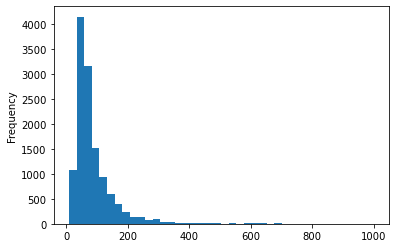

In [49]:
ax = airbnb_under_1000['price'].plot.hist(bins=40)

## Βιβλιογραφία

pandas Tutorial for Beginners, https://www.datacamp.com/tutorial/pandas, Πρόσβαση: 18/05/2022

Reading and Writing CSV Files in Python, https://realpython.com/python-csv/#reading-csv-files-with-csv, Πρόσβαση: 18/05/2022

Reading CSV files in Python, https://www.programiz.com/python-programming/reading-csv-files, Πρόσβαση: 18/05/2022

COVID-19 Coronavirus Pandemic, https://www.kaggle.com/datasets/rinichristy/covid19-coronavirus-pandemic, Πρόσβαση: 18/05/2022
Pandas User Guide, https://pandas.pydata.org/docs/user_guide/index.html#user-guide, Πρόσβαση: 23/05/2022

McKinney, W., 2013. Python for data analysis. O’Reilly, Beijing.

